<a href="https://colab.research.google.com/github/TrustPaul/CS6421-Assignment1/blob/master/PaulTrustDeeplearningAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS6421 Deep Learning Assignment one
Name: Paul Trust
Student Number: 120222601
Email:120222601@umail.ucc.ie


In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


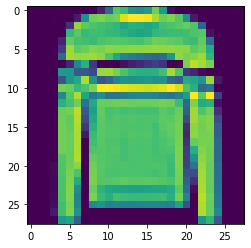

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [5]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [6]:
# Baseline Model
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [7]:

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 65s 76ms/step - loss: 0.8159 - accuracy: 0.7025 - val_loss: 0.3791 - val_accuracy: 0.8672

Epoch 00001: val_loss improved from inf to 0.37909, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 65s 75ms/step - loss: 0.4126 - accuracy: 0.8501 - val_loss: 0.3140 - val_accuracy: 0.8888

Epoch 00002: val_loss improved from 0.37909 to 0.31401, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 65s 75ms/step - loss: 0.3648 - accuracy: 0.8660 - val_loss: 0.2896 - val_accuracy: 0.8970

Epoch 00003: val_loss improved from 0.31401 to 0.28955, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 65s 76ms/step - loss: 0.3358 - accuracy: 0.8784 - val_loss: 0.2762 - val_accuracy: 0.9012

Epoch 00004: val_loss improved from 0.28955 to 0.27622, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9103000164031982


In [ ]:
# Modifications of filters to (32,16)
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)              

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 36s 42ms/step - loss: 0.9065 - accuracy: 0.6668 - val_loss: 0.4004 - val_accuracy: 0.8612

Epoch 00001: val_loss improved from inf to 0.40045, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 36s 42ms/step - loss: 0.4697 - accuracy: 0.8300 - val_loss: 0.3490 - val_accuracy: 0.8766

Epoch 00002: val_loss improved from 0.40045 to 0.34897, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 36s 42ms/step - loss: 0.4227 - accuracy: 0.8479 - val_loss: 0.3194 - val_accuracy: 0.8868

Epoch 00003: val_loss improved from 0.34897 to 0.31939, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 36s 42ms/step - loss: 0.3886 - accuracy: 0.8569 - val_loss: 0.3052 - val_accuracy: 0.8890

Epoch 00004: val_loss improved from 0.31939 to 0.30517, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9000999927520752


In [ ]:
# Modifications of filters to (64,64)
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)             

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 80s 93ms/step - loss: 0.7787 - accuracy: 0.7122 - val_loss: 0.3558 - val_accuracy: 0.8772

Epoch 00001: val_loss improved from inf to 0.35582, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 80s 93ms/step - loss: 0.4019 - accuracy: 0.8565 - val_loss: 0.2998 - val_accuracy: 0.8960

Epoch 00002: val_loss improved from 0.35582 to 0.29982, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 80s 93ms/step - loss: 0.3512 - accuracy: 0.8706 - val_loss: 0.2840 - val_accuracy: 0.8978

Epoch 00003: val_loss improved from 0.29982 to 0.28400, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 79s 92ms/step - loss: 0.3224 - accuracy: 0.8826 - val_loss: 0.2674 - val_accuracy: 0.9018

Epoch 00004: val_loss improved from 0.28400 to 0.26735, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9158999919891357


In [ ]:
# Modiication of Kernel Size to (5,3)
# Model Parameters [(64,5),(32,3),(0.3,0.3)]
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)             

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 102s 118ms/step - loss: 0.8044 - accuracy: 0.7032 - val_loss: 0.3523 - val_accuracy: 0.8774

Epoch 00001: val_loss improved from inf to 0.35230, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 101s 117ms/step - loss: 0.4044 - accuracy: 0.8555 - val_loss: 0.3000 - val_accuracy: 0.8912

Epoch 00002: val_loss improved from 0.35230 to 0.30000, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 101s 117ms/step - loss: 0.3409 - accuracy: 0.8758 - val_loss: 0.2697 - val_accuracy: 0.9020

Epoch 00003: val_loss improved from 0.30000 to 0.26969, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 100s 117ms/step - loss: 0.3151 - accuracy: 0.8826 - val_loss: 0.2689 - val_accuracy: 0.8992

Epoch 00004: val_loss improved from 0.26969 to 0.26887, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9108999967575073


In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

In [ ]:
# Modifications to kernel size(3,2)
#Model Parameters[(64,3),(32,2),(0.3,0.3)]
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)             

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 67s 78ms/step - loss: 0.8182 - accuracy: 0.6981 - val_loss: 0.3770 - val_accuracy: 0.8710

Epoch 00001: val_loss improved from inf to 0.37704, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 67s 78ms/step - loss: 0.4154 - accuracy: 0.8488 - val_loss: 0.3120 - val_accuracy: 0.8864

Epoch 00002: val_loss improved from 0.37704 to 0.31201, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 66s 77ms/step - loss: 0.3675 - accuracy: 0.8658 - val_loss: 0.2763 - val_accuracy: 0.8990

Epoch 00003: val_loss improved from 0.31201 to 0.27633, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 67s 78ms/step - loss: 0.3365 - accuracy: 0.8760 - val_loss: 0.2623 - val_accuracy: 0.9046

Epoch 00004: val_loss improved from 0.27633 to 0.26232, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9121000170707703


In [ ]:
# Modification of Dropout to (0.3,0.25)
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)             

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


Epoch 1/10
860/860 [==============================] - 65s 75ms/step - loss: 0.8098 - accuracy: 0.6982 - val_loss: 0.3791 - val_accuracy: 0.8704

Epoch 00001: val_loss improved from inf to 0.37908, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 64s 75ms/step - loss: 0.4277 - accuracy: 0.8457 - val_loss: 0.3215 - val_accuracy: 0.8832

Epoch 00002: val_loss improved from 0.37908 to 0.32149, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 64s 75ms/step - loss: 0.3758 - accuracy: 0.8629 - val_loss: 0.2862 - val_accuracy: 0.8950

Epoch 00003: val_loss improved from 0.32149 to 0.28625, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 64s 75ms/step - loss: 0.3401 - accuracy: 0.8768 - val_loss: 0.2742 - val_accuracy: 0.8982

Epoch 00004: val_loss improved from 0.28625 to 0.27424, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9107000231742859


In [ ]:
# Modification of Dropout to (0.25,0.25)
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)            

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


Epoch 1/10
860/860 [==============================] - 66s 76ms/step - loss: 0.8252 - accuracy: 0.6965 - val_loss: 0.3675 - val_accuracy: 0.8736

Epoch 00001: val_loss improved from inf to 0.36748, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 65s 76ms/step - loss: 0.4138 - accuracy: 0.8503 - val_loss: 0.3190 - val_accuracy: 0.8890

Epoch 00002: val_loss improved from 0.36748 to 0.31895, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 65s 76ms/step - loss: 0.3581 - accuracy: 0.8694 - val_loss: 0.2884 - val_accuracy: 0.8958

Epoch 00003: val_loss improved from 0.31895 to 0.28839, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 66s 76ms/step - loss: 0.3307 - accuracy: 0.8792 - val_loss: 0.2841 - val_accuracy: 0.8966

Epoch 00004: val_loss improved from 0.28839 to 0.28409, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:

# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.909500002861023


In [44]:
# Baseline Model with an extra layer
#Model parameters[(62,2),(32,2),(0.3,0,0.3),(64,2),(32,2),(0.3,0.3)]
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 64)        

In [45]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 61s 70ms/step - loss: 1.5033 - accuracy: 0.4140 - val_loss: 0.6198 - val_accuracy: 0.7662

Epoch 00001: val_loss improved from inf to 0.61984, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 60s 70ms/step - loss: 0.7408 - accuracy: 0.7209 - val_loss: 0.5182 - val_accuracy: 0.8124

Epoch 00002: val_loss improved from 0.61984 to 0.51824, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 60s 70ms/step - loss: 0.6500 - accuracy: 0.7568 - val_loss: 0.4790 - val_accuracy: 0.8326

Epoch 00003: val_loss improved from 0.51824 to 0.47902, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 60s 70ms/step - loss: 0.6069 - accuracy: 0.7750 - val_loss: 0.4454 - val_accuracy: 0.8428

Epoch 00004: val_loss improved from 0.47902 to 0.44542, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [47]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [48]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8623999953269958


In [19]:
#Group 1 First Experiment
# Model Parameters[(32,2),(16,2),(0.3,0.3)]
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)              

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 37s 43ms/step - loss: 0.9148 - accuracy: 0.6575 - val_loss: 0.4175 - val_accuracy: 0.8544

Epoch 00001: val_loss improved from inf to 0.41753, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 37s 42ms/step - loss: 0.4766 - accuracy: 0.8246 - val_loss: 0.3703 - val_accuracy: 0.8708

Epoch 00002: val_loss improved from 0.41753 to 0.37033, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 37s 42ms/step - loss: 0.4362 - accuracy: 0.8412 - val_loss: 0.3460 - val_accuracy: 0.8790

Epoch 00003: val_loss improved from 0.37033 to 0.34596, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 37s 43ms/step - loss: 0.3978 - accuracy: 0.8546 - val_loss: 0.3172 - val_accuracy: 0.8858

Epoch 00004: val_loss improved from 0.34596 to 0.31716, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [ ]:

# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8729000091552734


In [ ]:
#Group 1 Second Experiment
# Model Parameters[(128,2),(64,2),(0.3,0.3)]
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)            

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 144s 167ms/step - loss: 0.7524 - accuracy: 0.7277 - val_loss: 0.3434 - val_accuracy: 0.8794

Epoch 00001: val_loss improved from inf to 0.34343, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 142s 165ms/step - loss: 0.3972 - accuracy: 0.8550 - val_loss: 0.3030 - val_accuracy: 0.8886

Epoch 00002: val_loss improved from 0.34343 to 0.30301, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 142s 165ms/step - loss: 0.3414 - accuracy: 0.8766 - val_loss: 0.2738 - val_accuracy: 0.8986

Epoch 00003: val_loss improved from 0.30301 to 0.27379, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 139s 162ms/step - loss: 0.3145 - accuracy: 0.8859 - val_loss: 0.2526 - val_accuracy: 0.9078

Epoch 00004: val_loss improved from 0.27379 to 0.25264, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9160000085830688


In [ ]:
#Group 1 THird Experiment
# Model Parameters[(32,5),(16,5),(0.2,0.2)]
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 16)        12816     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)             

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 87s 101ms/step - loss: 0.8370 - accuracy: 0.6926 - val_loss: 0.3448 - val_accuracy: 0.8794

Epoch 00001: val_loss improved from inf to 0.34482, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 86s 100ms/step - loss: 0.3959 - accuracy: 0.8544 - val_loss: 0.2999 - val_accuracy: 0.8892

Epoch 00002: val_loss improved from 0.34482 to 0.29989, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 86s 100ms/step - loss: 0.3505 - accuracy: 0.8722 - val_loss: 0.2759 - val_accuracy: 0.8984

Epoch 00003: val_loss improved from 0.29989 to 0.27586, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 86s 100ms/step - loss: 0.3204 - accuracy: 0.8822 - val_loss: 0.2631 - val_accuracy: 0.9036

Epoch 00004: val_loss improved from 0.27586 to 0.26314, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.909600019454956


In [ ]:
# Baseline Model
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)             

In [ ]:

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 117s 136ms/step - loss: 0.9629 - accuracy: 0.6426 - val_loss: 0.3707 - val_accuracy: 0.8666

Epoch 00001: val_loss improved from inf to 0.37071, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 115s 134ms/step - loss: 0.4364 - accuracy: 0.8418 - val_loss: 0.3061 - val_accuracy: 0.8878

Epoch 00002: val_loss improved from 0.37071 to 0.30613, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 115s 134ms/step - loss: 0.3746 - accuracy: 0.8607 - val_loss: 0.2913 - val_accuracy: 0.8906

Epoch 00003: val_loss improved from 0.30613 to 0.29131, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 115s 133ms/step - loss: 0.3435 - accuracy: 0.8750 - val_loss: 0.2652 - val_accuracy: 0.9002

Epoch 00004: val_loss improved from 0.29131 to 0.26518, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')


In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 123s 142ms/step - loss: 0.9568 - accuracy: 0.6499 - val_loss: 0.3655 - val_accuracy: 0.8680

Epoch 00001: val_loss improved from inf to 0.36546, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 124s 144ms/step - loss: 0.4380 - accuracy: 0.8433 - val_loss: 0.3046 - val_accuracy: 0.8874

Epoch 00002: val_loss improved from 0.36546 to 0.30458, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 125s 146ms/step - loss: 0.3669 - accuracy: 0.8689 - val_loss: 0.2822 - val_accuracy: 0.8924

Epoch 00003: val_loss improved from 0.30458 to 0.28218, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 124s 144ms/step - loss: 0.3410 - accuracy: 0.8755 - val_loss: 0.2624 - val_accuracy: 0.9022

Epoch 00004: val_loss improved from 0.28218 to 0.26242, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9120000004768372


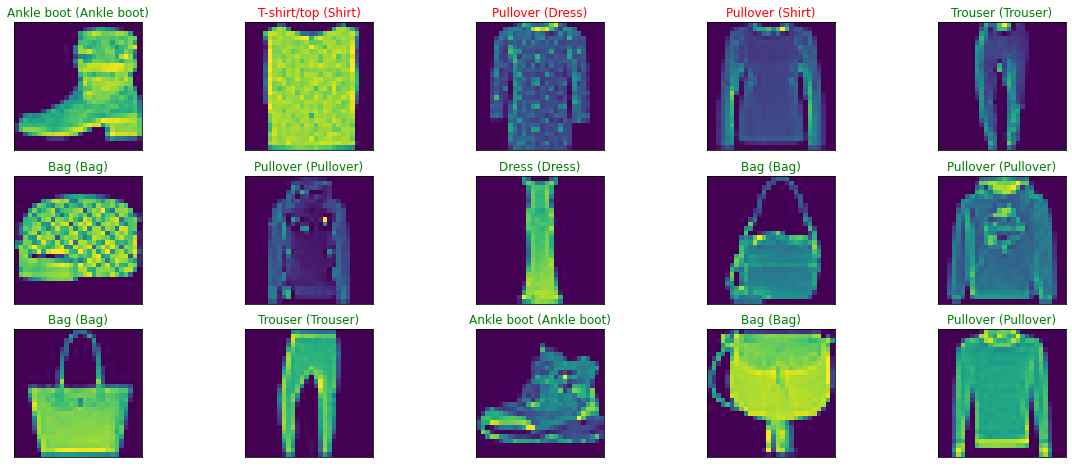

In [ ]:

y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
  #def cnn_model(features, labels, mode) is more complex than is needed for this assignment    #Reshapinng the input
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
# TO DO: WRITE A FUNCTION TO INPUT A CONVOLUTION LAYER,
#   denoting inputs=input_layer,filters, kernel_size, padding="same",
#        activation
def 
# TO DO: WRITE A FUNCTION TO INPUT A POOLING LAYER, 
#    denoting inputs pool_size, strides

# DEFINE THE MODEL USING THE CODE YOU JUST WROTE

     # Convolutional Layer #1 and Pooling Layer #1
    conv1 = 
    
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2

    
   
   dropout_1 = tf.layers.dropout(inputs=pool2, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )

    # Convolutional Layer #2 Pooling Layer #2   Dropout #2

    # TO DO: IMPLEMENT CODE FOR THE DECISION AND OUTPUT LAYERS

 # Take a look at the model summary
model.summary()

  #  make sure the model matches the baseline model